In [20]:
import torch

In [14]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import scipy

# Retrieve pickle and csv data

In [2]:
## pickle ##
import pickle

file = open('/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/robin_data_tensor_dump.pkl', 'rb')
filtered_data_to_tensor = pickle.load(file)
amplitude_filtereddata_to_tensor  = pickle.load(file)
peak2peak_data_to_tensor = pickle.load(file)

file.close()



In [36]:
# to retrieve ##
mt_electrodes = pd.read_csv('/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/mt_electrodes.csv')
mt_muscles= pd.read_csv("/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/mt_muscles.csv")
unique_amplitudes=pd.read_csv("/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/unique_amplitudes.csv")

# Saving the Recruitment plots

In [70]:
save_flag=1
# subject_plots_folder_name=subject+'_plots'
data_folder = "/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data"
save_folder = os.path.join(data_folder,"Recruitment_curve")
os.makedirs(save_folder,exist_ok=True)

# Recruitment curve

## One elec one Amp

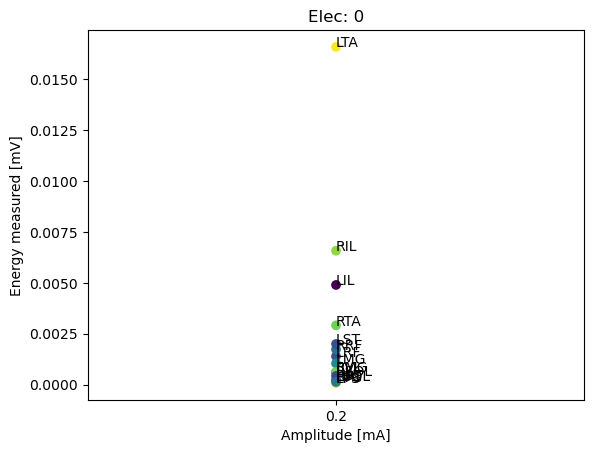

In [94]:
# Wonder if this works!!

# For now only with one elec
elec_i=0


x = [0.2]*len(peak2peak_data_to_tensor [elec_i, :,4,0, 0]) # specific amplitude

y = peak2peak_data_to_tensor [elec_i, :,4,0, 0]
label=mt_muscles["muscle_name"]
# use colormap
#https://www.geeksforgeeks.org/how-to-create-a-scatter-plot-with-several-colors-in-matplotlib/
# colormap = np.array(['r', 'g', 'b'])
colors = np.random.uniform(15, 80, len(x))
# Create just a figure and only one subplot
fig, ax = plt.subplots()

ax.set_xlabel("Amplitude [mA]")
ax.set_ylabel("Energy measured [mV]")
ax.set_xticks(list(unique_amplitudes["amplitudes"]))
# ax.set_xticklables(...)
# ax.set_xticks(ticks=list(unique_amplitudes["amplitudes"]), labels=np.array(mt_muscles["muscle_name"]))
ax.scatter(x, y, c=colors)
ax.set_title(f"Elec: {elec_i}")
for index in range(len(x)):
  ax.text(x[index], y[index], label[index], size=10) 

# ax.text(x, y, "muslce", fontsize = "xx-large" ,color = "snow", horizontalalignment = "center", verticalalignment = "center")




## One elec all amps

Now try to include all the amps

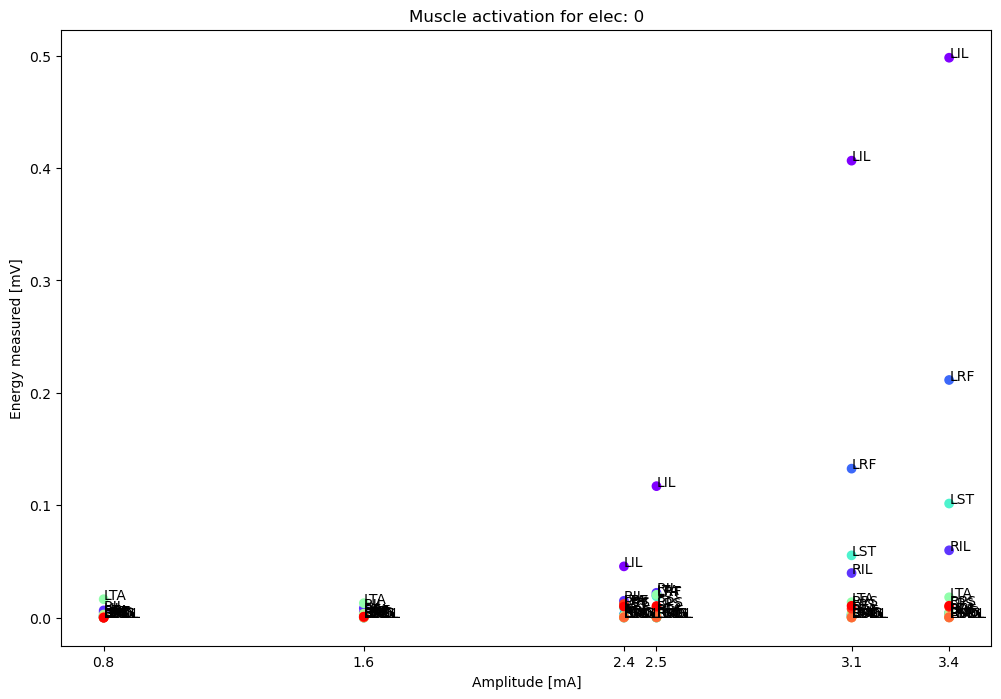

In [67]:
# try with all the amps
import matplotlib.cm as cm
# For now only with one elec
elec_i=0
label=mt_muscles["muscle_name"]
fig, ax = plt.subplots(figsize=(12,8))
ticks=[]

colors = cm.rainbow(np.linspace(0,1, len(x)))
for amp_ind in range (len(unique_amplitudes)):
  
  #Check if nan values for this amplitude
  if torch.isnan(amplitude_filtereddata_to_tensor[elec_i, 0, amp_ind])==True:
    continue
  
  x = [unique_amplitudes["amplitudes"][amp_ind]]*len(peak2peak_data_to_tensor [elec_i, :,amp_ind,0, 0]) # specific amplitude
  ticks.append(unique_amplitudes["amplitudes"][amp_ind])
  y = peak2peak_data_to_tensor [elec_i, :,amp_ind,0, 0]
  ax.scatter(x, y, c=colors)
  for index in range(len(x)):
    ax.text(x[index], y[index], label[index], size=10) 
  


# Create just a figure and only one subplot

ax.set_xlabel("Amplitude [mA]")
ax.set_xticks(ticks)

# ax.set_xticks(list(unique_amplitudes["amplitudes"]))
ax.set_ylabel("Energy measured [mV]")
ax.set_title(f"Muscle activation for elec: {elec_i}")
plt.show()

# ax.text(x, y, "muslce", fontsize = "xx-large" ,color = "snow", horizontalalignment = "center", verticalalignment = "center")

## All elecs for all amps

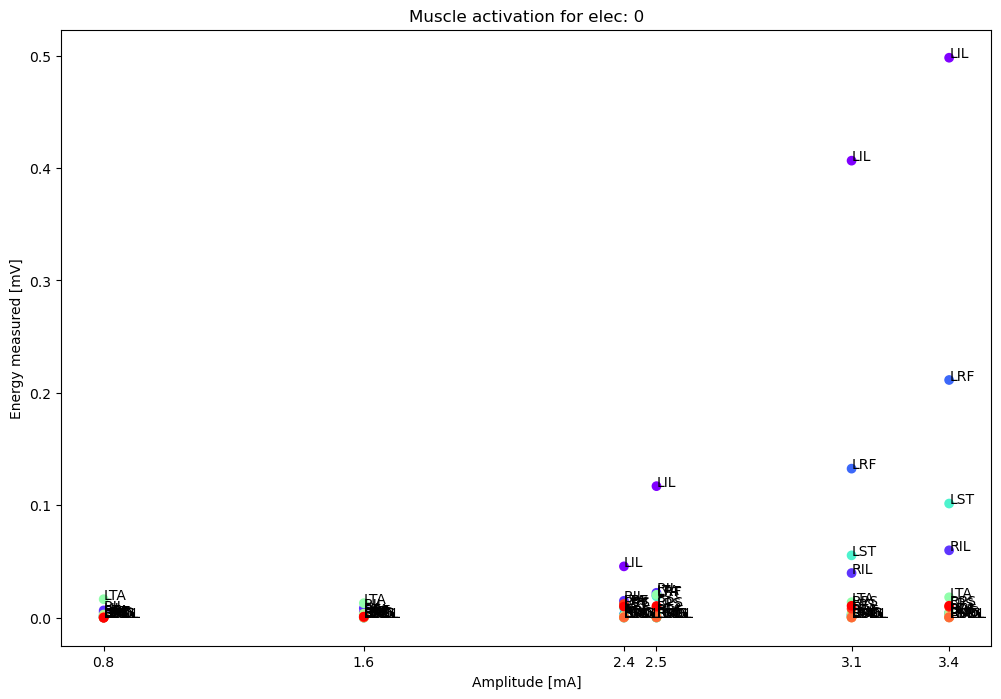

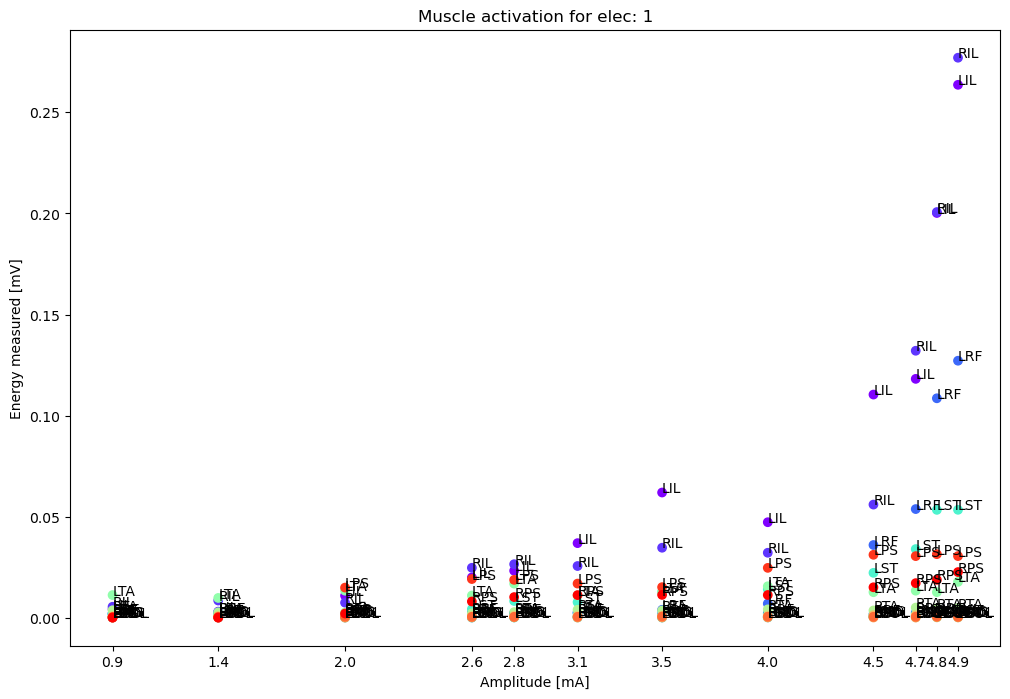

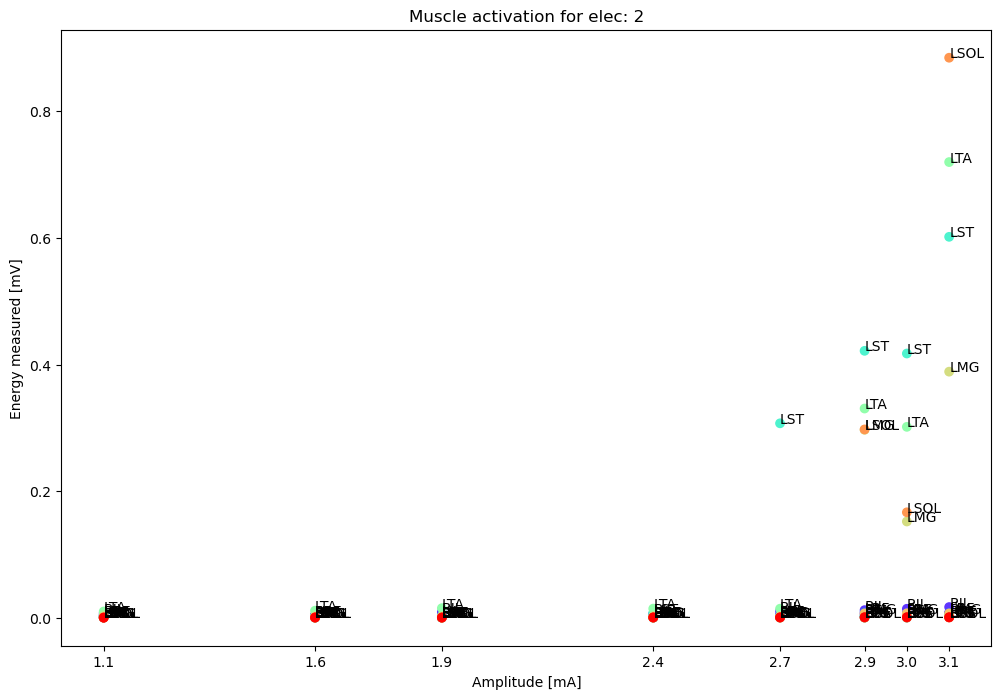

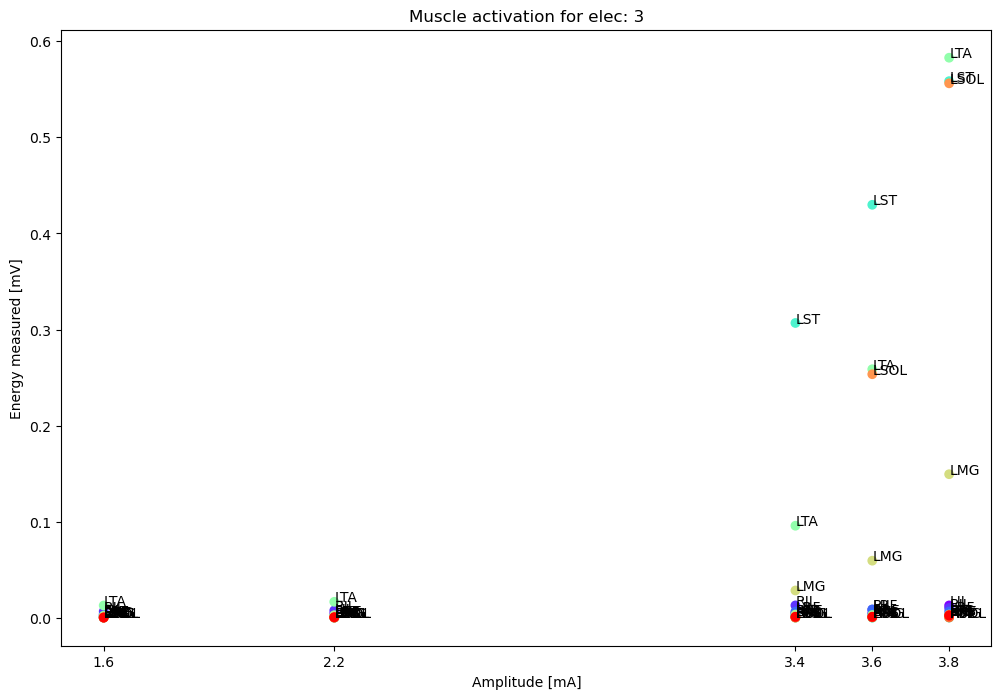

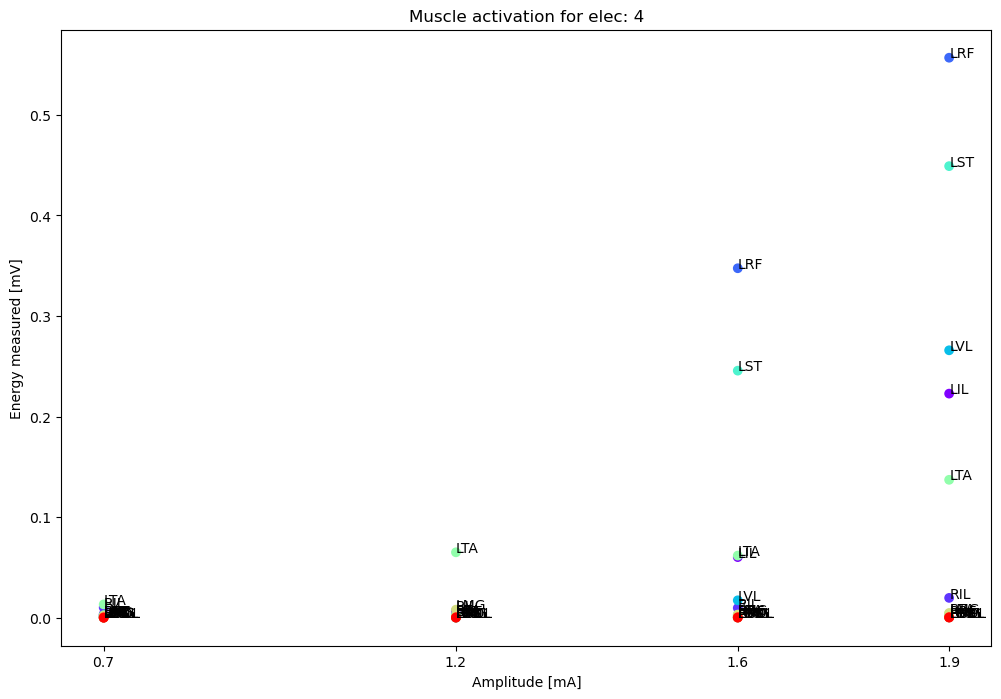

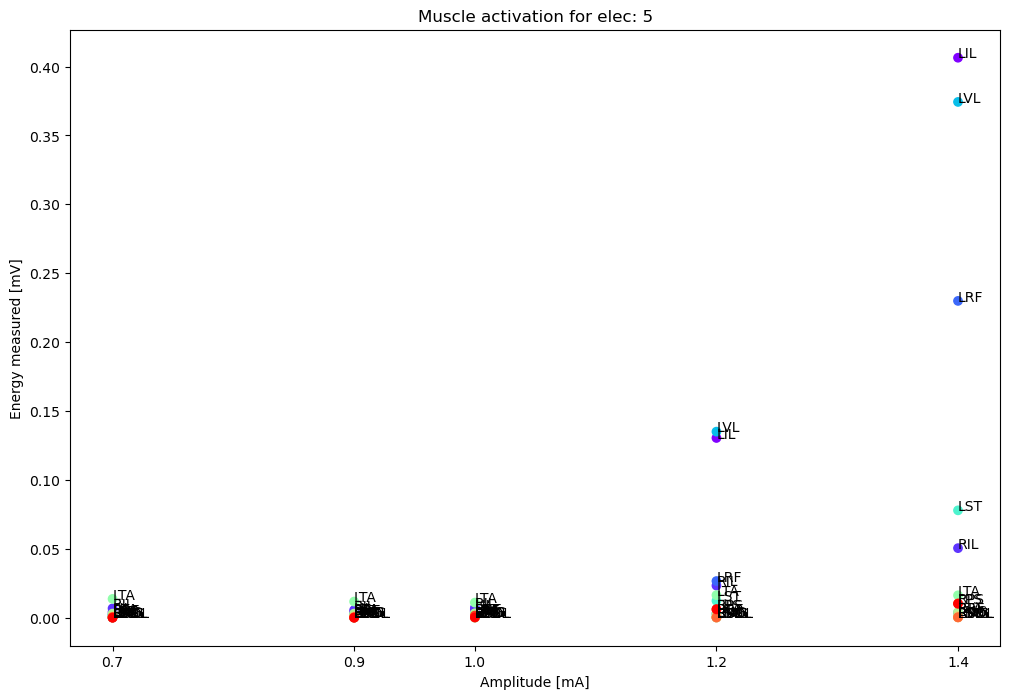

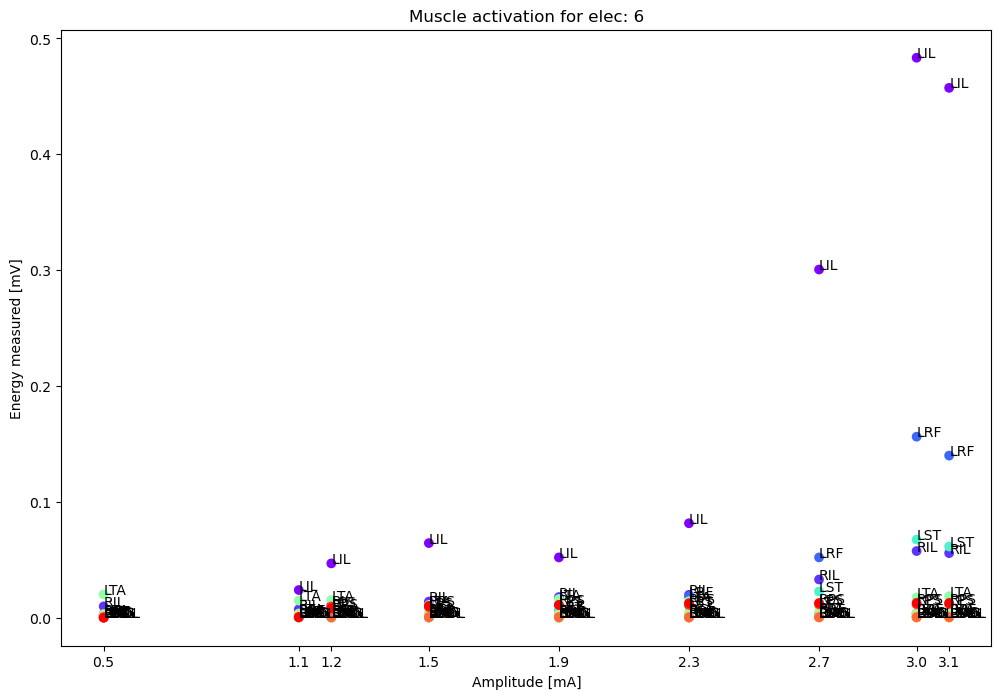

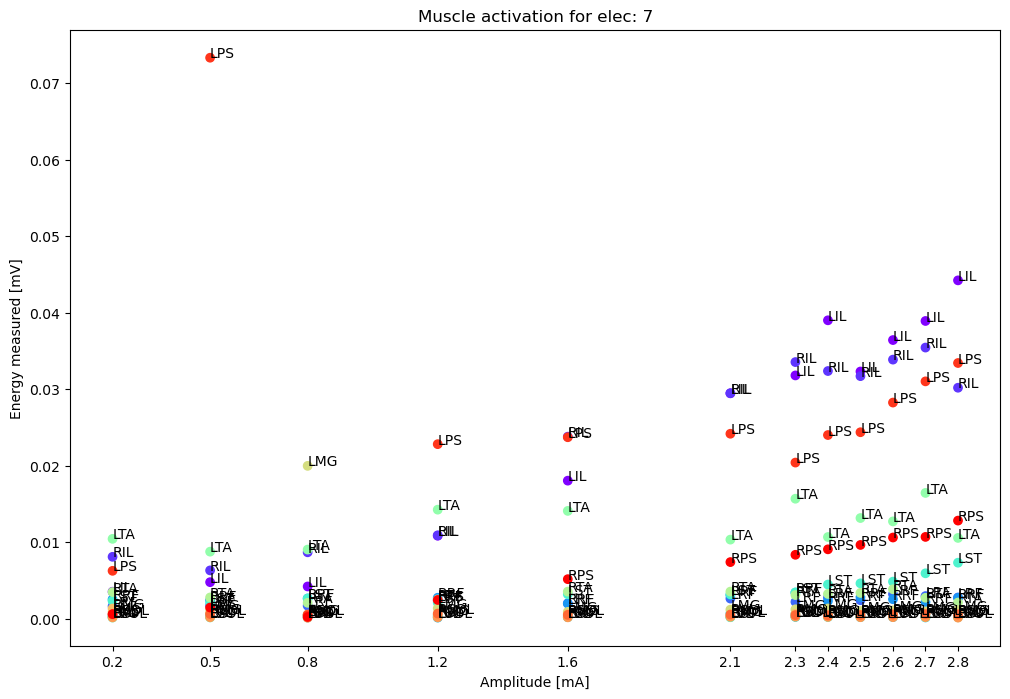

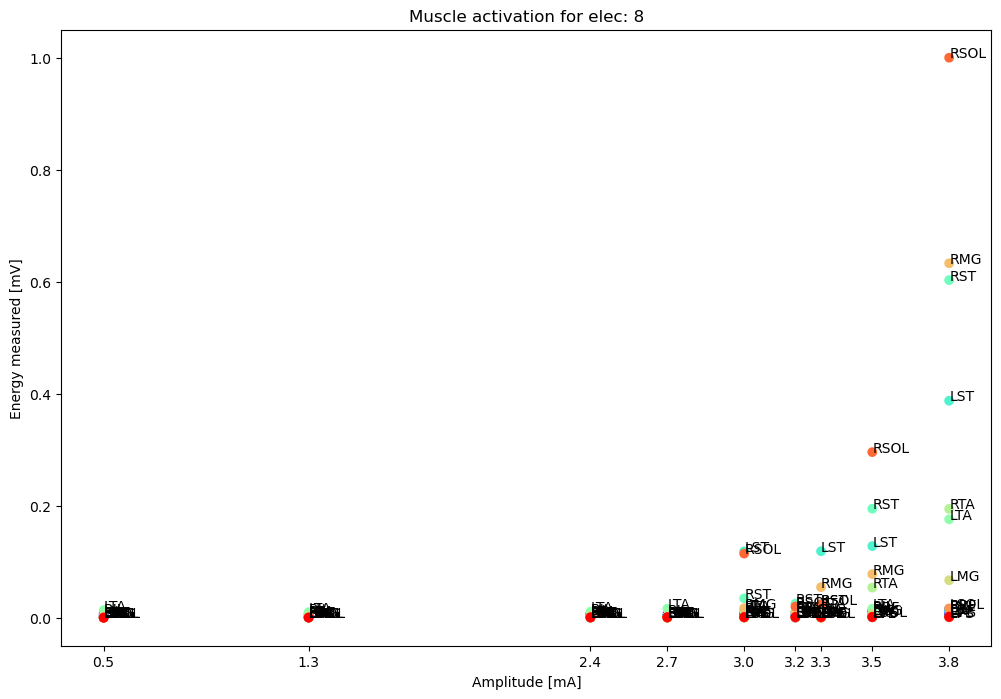

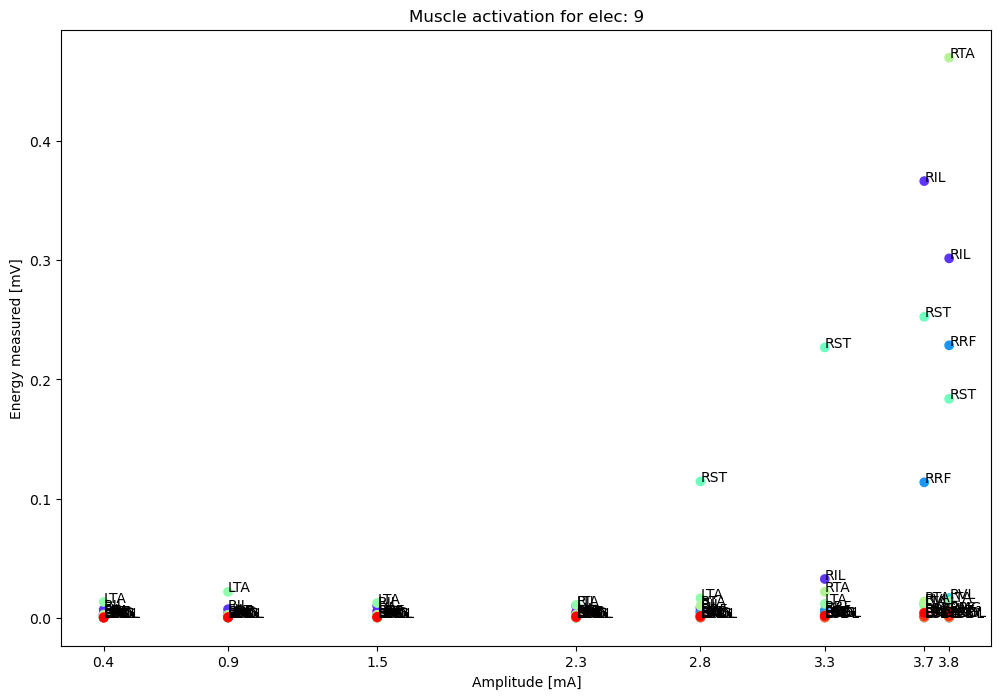

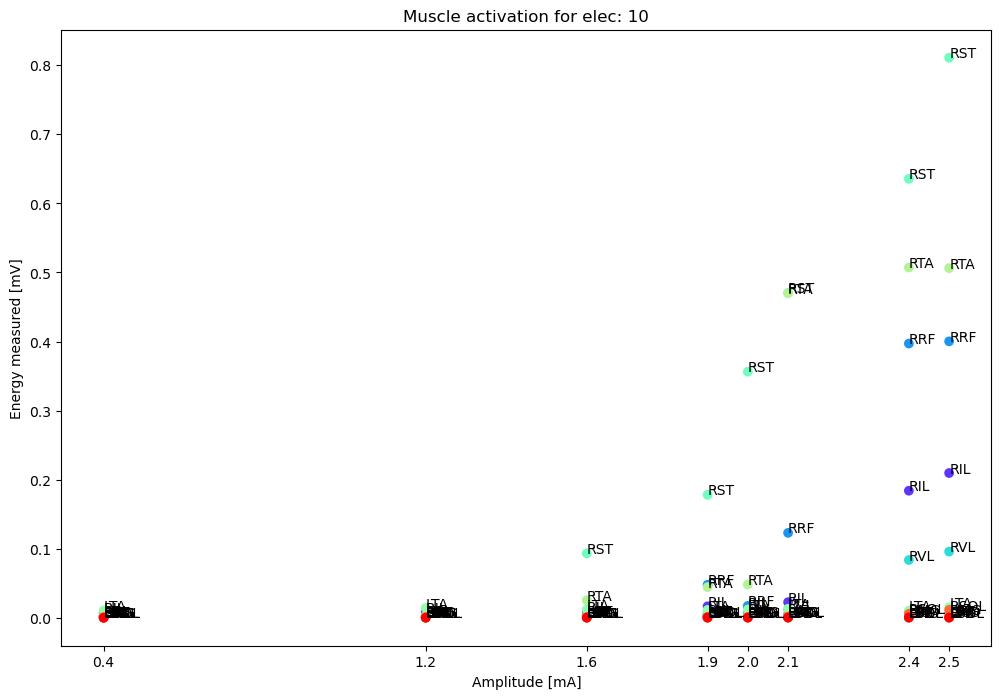

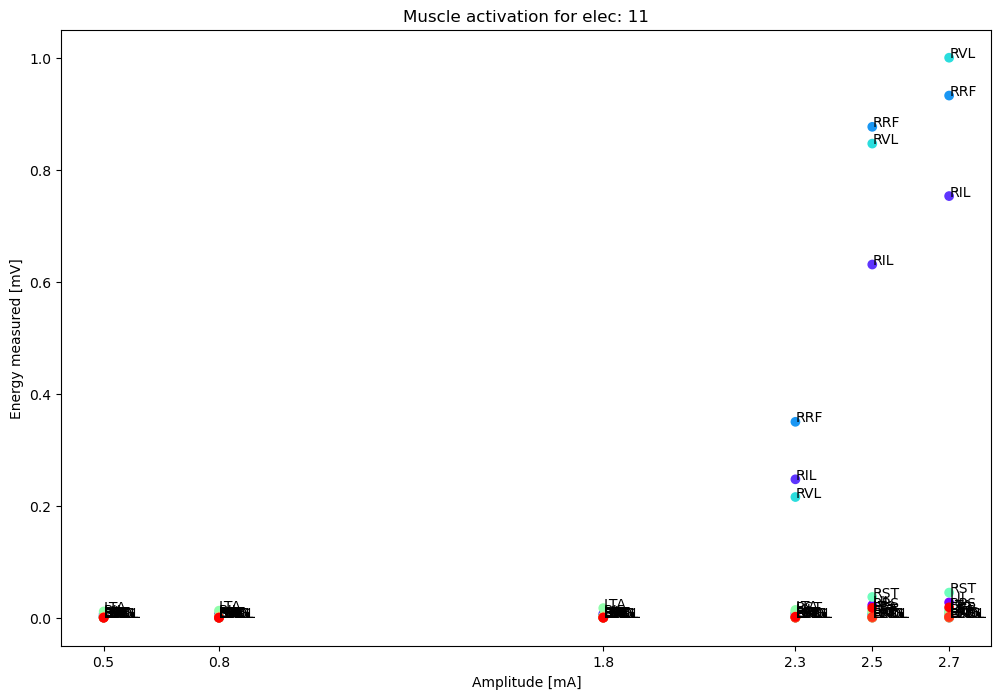

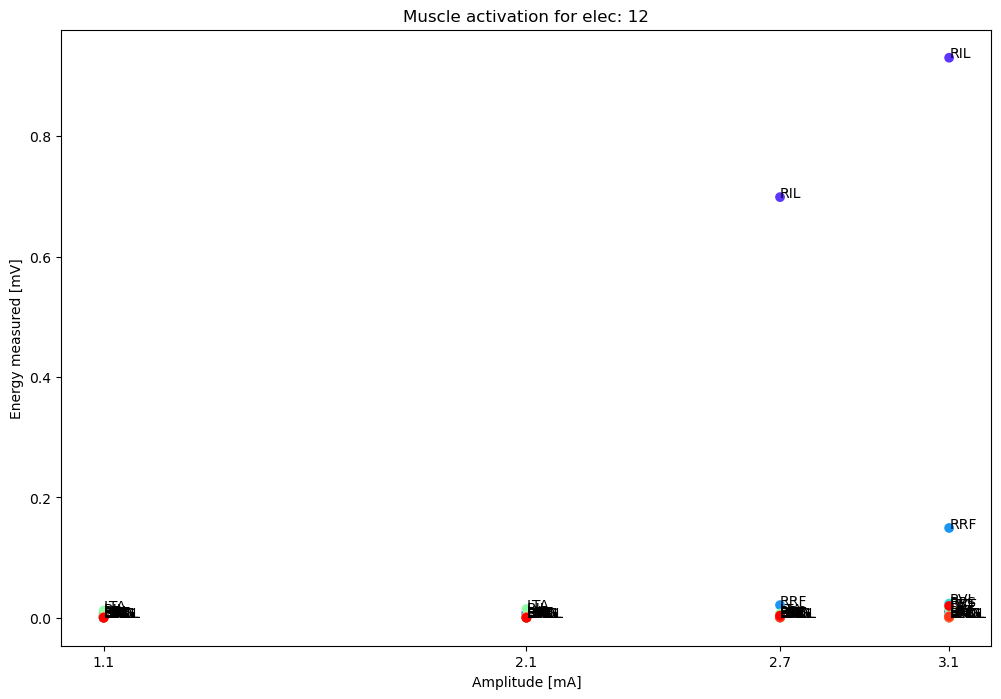

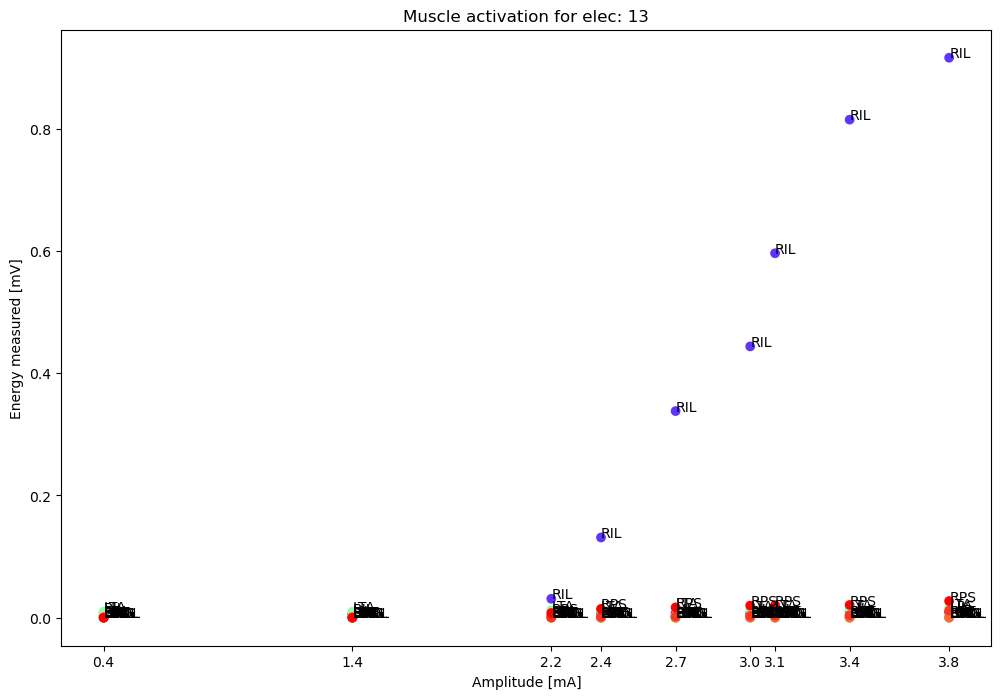

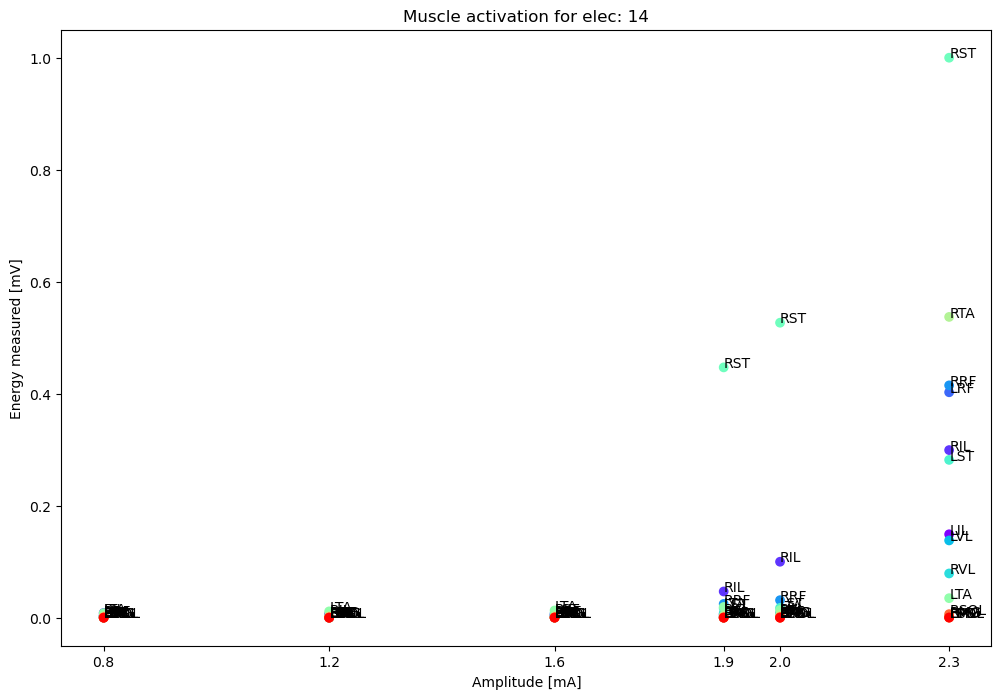

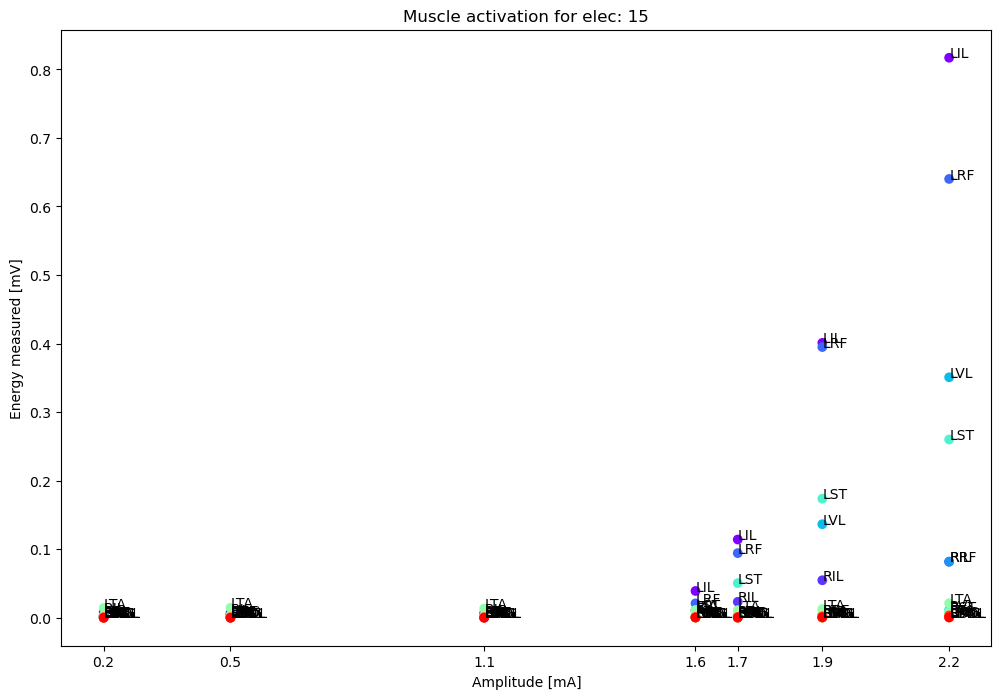

In [73]:
#Try with all elecs and all amps 

colors = cm.rainbow(np.linspace(0,1, len(x)))
label=mt_muscles["muscle_name"]
for elec_i in range( 0, len(mt_electrodes)):

    fig, ax = plt.subplots(figsize=(12,8))
    ticks=[]
    
    for amp_ind in range (len(unique_amplitudes)):
    
        #Check if nan values for this amplitude
        if torch.isnan(amplitude_filtereddata_to_tensor[elec_i, 0, amp_ind])==True:
            continue
    
        x = [unique_amplitudes["amplitudes"][amp_ind]]*len(peak2peak_data_to_tensor [elec_i, :,amp_ind,0, 0]) # specific amplitude
        ticks.append(unique_amplitudes["amplitudes"][amp_ind])
        y = peak2peak_data_to_tensor [elec_i, :,amp_ind,0, 0]
        ax.scatter(x, y, c=colors)
        for index in range(len(x)):
            ax.text(x[index], y[index], label[index], size=10) 
        
    # Create just a figure and only one subplot
    ax.set_xlabel("Amplitude [mA]")
    ax.set_xticks(ticks)

    # ax.set_xticks(list(unique_amplitudes["amplitudes"]))
    ax.set_ylabel("Energy measured [mV]")
    ax.set_title(f"Muscle activation for elec: {elec_i}")
    if save_flag:
        data_file = "elec"+"_"+str(elec_i)+"_"+"recruitment_curve"+'.png'
        data_file_path = os.path.join(save_folder,data_file)
        plt.savefig(data_file_path, transparent = "False",  bbox_inches='tight')
    plt.show()

    

# Calculate Integral

In [45]:
# mt_muscles["muscle_name"][8]
unique_amplitudes["amplitudes"][4]


0.8

In [49]:
peak2peak_data_to_tensor[0, :, 4, 0, :]

tensor([[4.8937e-03],
        [6.5755e-03],
        [1.3929e-03],
        [1.7329e-03],
        [1.9343e-04],
        [6.1165e-04],
        [1.9999e-03],
        [2.2885e-04],
        [1.6570e-02],
        [2.9131e-03],
        [1.0490e-03],
        [6.1961e-04],
        [1.9262e-04],
        [4.3168e-04],
        [8.9449e-05],
        [1.3855e-04]])

In [ ]:

scipy.integrate.simps(y, x=None, dx=1, axis=- 1, even='avg')
# y are all the p to p values of one time series # eventually a problem since we just have one valuee( max?)
#x= np.arange(0, len(y))

# Save tensor as pickle file

In [1]:
### save files as pickle file  to projectome_finder#
#to run set run=1
import pickle


file = open('/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/robin_data_tensor_dump.pkl', "wb")
obj_1 = filtered_data_to_tensor #torch.Size([16, 16, 40, 39, 1000])
# obj_2 = amplitude_filtereddata_to_tensor

pickle.dump(obj_1, file)
# pickle.dump(obj_2, file)


file.close()





## to retrieve ##
# file = open('/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/robin_data_tensor_dump.pkl', 'rb')
# filtered_data_to_tensor = pickle.load(file)
# amplitude_filtereddata_to_tensor  = pickle.load(file)

# file.close()

NameError: name 'filtered_data_to_tensor' is not defined